In [ ]:
!pip install contractions
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import contractions
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('wordnet')
from nltk import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLProject/Dataset/train.csv')
df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [ ]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
df.drop(columns=['ID', 'TITLE'])

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...
20967,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,We present a new approach for identifying si...,1,0,0,0,0,0
20970,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [ ]:
def process_text(df):
  final_abstracts = []
  for i in range(len(df)):
    l = [sent for sent in nltk.sent_tokenize(df['ABSTRACT'][i])]
    l_words = []
    l_new = {}
    sentences = []
    for i in range(len(l)):
      words = nltk.word_tokenize(l[i])

      #fix punctuations
      sentence = ' '.join(words).replace(' , ',', ').replace(' .','.').replace(' !','!')
      sentence = sentence.replace(' ?','?').replace(' : ',': ').replace(' \'', '\'')
      sentence = sentence.replace(' ’ ', '\'').replace(' ’', '\'').replace('\n', '')

      #expand contractions
      expanded_words = []
      for word in sentence.split():
        expanded_words.append(contractions.fix(word))
      expanded_sent = ' '.join(expanded_words)
      words = nltk.word_tokenize(expanded_sent)
      l_new[sentence] = words
      sentences.append(sentence)

    #remove stopwords and punctuations
    for sentence in l_new.keys():
      new_words = []
      for word in l_new[sentence]:
        if word not in '!?.,;:' and word not in stop_words:
          new_words.append(word)
      l_new[sentence] = new_words

    #lemmatize the extracted words
    lem = WordNetLemmatizer()
    processed_data = {}
    for sent in l_new.keys():
      new_words = []
      for word in l_new[sent]:
        new_words.append(lem.lemmatize(word))
      processed_data[sent] = new_words

    #rejoin the sentences
    lst = []
    for sent in processed_data.keys():
      lst.append(' '.join(processed_data[sent]))
    final_abstracts.append(' '.join(lst))

  #convert the extracted features to dataframe
  processed_features = pd.DataFrame(final_abstracts, columns=['Abstract'])
  return processed_features

In [ ]:
vectorizer = TfidfVectorizer()
processed_features = pd.read_csv('/content/drive/MyDrive/MLProject/Shubhanshu/train_features.csv')
vectors = vectorizer.fit_transform(processed_features['Abstract'])

In [ ]:
from sklearn.model_selection import train_test_split
train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors, df[['Computer Science', 'Physics',	'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']], test_size=0.2, random_state=42)

In [ ]:
model = BinaryRelevance(MultinomialNB())
model.fit(train_vectors, train_labels)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
y_pred = model.predict(test_vectors)
y_pred = y_pred.toarray()

In [ ]:
metrics = []
acc = accuracy_score(test_labels, y_pred)
ham = hamming_loss(test_labels, y_pred)
print("Accuracy Score using BR:", acc)
print("Hamming Loss using BR:", ham)
metrics.append(['BR MultinomialNB', acc, ham])

Accuracy Score using BR: 0.5218116805721097
Hamming Loss using BR: 0.10981326976559395


In [ ]:
model = ClassifierChain(MultinomialNB())
model.fit(train_vectors, train_labels)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
y_pred = model.predict(test_vectors)
y_pred = y_pred.toarray()
acc = accuracy_score(test_labels, y_pred)
ham = hamming_loss(test_labels, y_pred)
print("Accuracy Score using CC:", acc)
print("Hamming Loss using CC:", ham)
metrics.append(['CC MultinomialNB', acc, ham])

Accuracy Score using CC: 0.5406436233611442
Hamming Loss using CC: 0.10548271752085817


In [ ]:
model = LabelPowerset(MultinomialNB())
model.fit(train_vectors, train_labels)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
y_pred = model.predict(test_vectors)
y_pred = y_pred.toarray()

In [ ]:
acc = accuracy_score(test_labels, y_pred)
ham = hamming_loss(test_labels, y_pred)
print("Accuracy Score using LP:", acc)
print("Hamming Loss using LP:", ham)
metrics.append(['LP MultinomialNB', acc, ham])

Accuracy Score using LP: 0.5868891537544696
Hamming Loss using LP: 0.11501787842669844


In [ ]:
from skmultilearn.ensemble import RakelD
model = RakelD(MultinomialNB())
model.fit(train_vectors, train_labels)

LabelSpacePartitioningClassifier(classifier=LabelPowerset(classifier=MultinomialNB(),
                                                          require_dense=[True,
                                                                         True]),
                                 clusterer=RandomLabelSpaceClusterer(allow_overlap=False,
                                                                     cluster_count=2,
                                                                     cluster_size=3),
                                 require_dense=[False, False])

In [ ]:
y_pred = model.predict(test_vectors)
y_pred = y_pred.toarray()

In [ ]:
acc = accuracy_score(test_labels, y_pred)
ham = hamming_loss(test_labels, y_pred)
print("Accuracy Score using Rakel:", acc)
print("Hamming Loss using Rakel:", ham)
metrics.append(['Rakel MultinomialNB', acc, ham])

Accuracy Score using Rakel: 0.6181168057210965
Hamming Loss using Rakel: 0.09094159713945173


In [ ]:
import matplotlib.pyplot as plt
results = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Hamming Loss'])

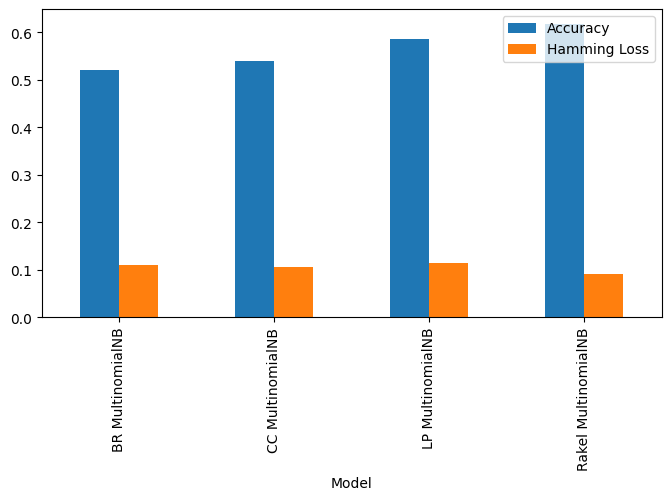

In [ ]:
results.plot(x='Model', y=['Accuracy', 'Hamming Loss'], kind='bar', figsize=(8,4))
plt.legend(loc='upper right')

In [ ]:
model = RakelD(MultinomialNB())
model.fit(vectors, df[['Computer Science', 'Physics',	'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']])

LabelSpacePartitioningClassifier(classifier=LabelPowerset(classifier=MultinomialNB(),
                                                          require_dense=[True,
                                                                         True]),
                                 clusterer=RandomLabelSpaceClusterer(allow_overlap=False,
                                                                     cluster_count=2,
                                                                     cluster_size=3),
                                 require_dense=[False, False])

In [ ]:
import pickle

with open('/content/drive/MyDrive/MLProject/Shubhanshu/model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
model.predict(test_vectors[0]).todense()

matrix([[1, 0, 0, 0, 0, 0]])

In [ ]:
filename = '/content/drive/MyDrive/MLProject/Shubhanshu/model.pkl'
with open(filename, 'rb') as f:
  x = pickle.load(f)
  print(x.shape)
  x.predict(vectors)
  print(x==model)

In [ ]:
from sklearn.ensemble import VotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.ensemble import MajorityVotingClassifier
from sklearn.cluster import KMeans
from skmultilearn.cluster import MatrixLabelSpaceClusterer
clf = BinaryRelevance(MultinomialNB())
eclf1 = classifier = MajorityVotingClassifier(
    clusterer=MatrixLabelSpaceClusterer(clusterer=KMeans(n_clusters=3)),
    classifier=clf)
eclf1.fit(train_vectors, train_labels)
y_pred = eclf1.predict(test_vectors)
acc = accuracy_score(test_labels, y_pred)
ham = hamming_loss(test_labels, y_pred)
print("Accuracy Score using Rakel:", acc)
print("Hamming Loss using Rakel:", ham)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skmultilearn/cluster/matrix.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(_membership_to_list_of_communities(result, 1 + max(result)))


Accuracy Score using Rakel: 0.5218116805721097
Hamming Loss using Rakel: 0.10981326976559395


In [ ]:
clf2 = LabelPowerset(MultinomialNB())
eclf2 = MajorityVotingClassifier(
    clusterer=FixedLabelSpaceClusterer([[0, 2, 3], [0, 4],
                                        [2, 3, 5], [1, 2],
                                        [1, 2, 3], [3, 5],
                                        [1, 4], [0, 5], [3, 4]]),
    classifier=clf2)
eclf2.fit(train_vectors, train_labels)
y_pred = eclf2.predict(test_vectors)
acc = accuracy_score(test_labels, y_pred)
ham = hamming_loss(test_labels, y_pred)
print("Accuracy Score using Rakel:", acc)
print("Hamming Loss using Rakel:", ham)

Accuracy Score using Rakel: 0.5625744934445769
Hamming Loss using Rakel: 0.1044497417560588
